In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
import sys
print(sys.version)

2.2.0
2.3.1
3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]


Using TensorFlow backend.


In [2]:
import os

base_dir = 'C:\\Users\\82103\\OneDrive\바탕 화면\\TechWeek'

train_dir = os.path.join(base_dir, 'Training_DataSet')
validation_dir = os.path.join(base_dir, 'validation')

train_eagle_dir = os.path.join(train_dir, '독수리')
train_top_dir = os.path.join(train_dir, '석탑')
train_library_dir = os.path.join(train_dir, '중도')
train_head_dir = os.path.join(train_dir, '본부')
train_computer_dir = os.path.join(train_dir, '제도관')
print(train_eagle_dir)

validation_eagle_dir = os.path.join(validation_dir, '독수리')
validation_top_dir = os.path.join(validation_dir, '석탑')
validation_library_dir = os.path.join(validation_dir, '중도')
validation_head_dir = os.path.join(validation_dir, '본부')
validation_computer_dir = os.path.join(validation_dir, '제도관')
print(validation_eagle_dir)

C:\Users\82103\OneDrive\바탕 화면\TechWeek\Training_DataSet\독수리
C:\Users\82103\OneDrive\바탕 화면\TechWeek\validation\독수리


In [3]:
train_eagle_fnames = os.listdir(train_eagle_dir)
train_top_fnames = os.listdir( train_top_dir )
train_library_fnames = os.listdir( train_library_dir )
train_head_fnames = os.listdir( train_head_dir )
train_computer_fnames = os.listdir( train_computer_dir )

print(train_eagle_fnames[:5])
print(train_top_fnames[:5])

['웅비 (1).jpeg', '웅비 (1).JPG', '웅비 (10).JPG', '웅비 (100).JPG', '웅비 (101).JPG']
['석탑 (1).JPG', '석탑 (10).JPG', '석탑 (100).JPG', '석탑 (101).JPG', '석탑 (102).JPG']


In [4]:
print('Total training eagle images :', len(os.listdir(train_eagle_dir)))
print('Total training top images :', len(os.listdir(train_top_dir)))

print('Total validation eagle images :', len(os.listdir(validation_eagle_dir)))
print('Total validation top images :', len(os.listdir(validation_top_dir)))

Total training eagle images : 150
Total training top images : 150
Total validation eagle images : 200
Total validation top images : 200


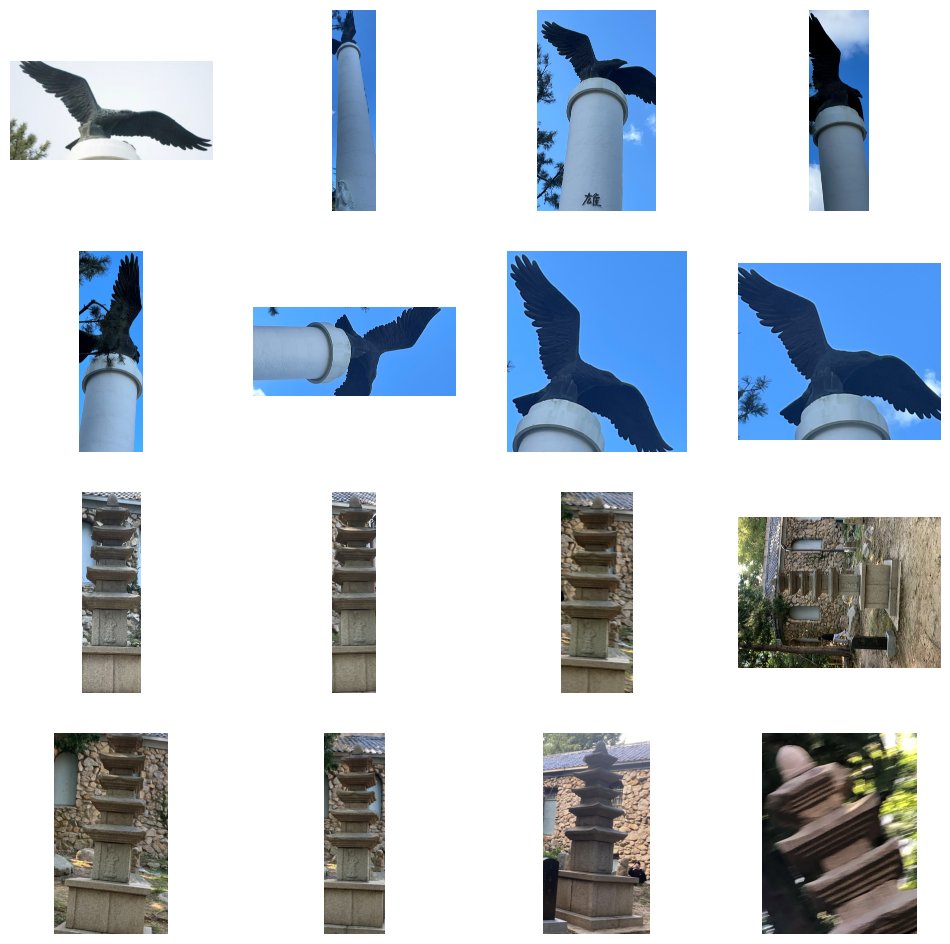

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_eagle_pix = [os.path.join(train_eagle_dir, fname)
                for fname in train_eagle_fnames[ pic_index-8:pic_index]]

next_top_pix = [os.path.join(train_top_dir, fname)
                for fname in train_top_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_eagle_pix+next_top_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)
test_generator =  test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode  = 'categorical'
)

Found 750 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [7]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'독수리': 0, '본부': 1, '석탑': 2, '제도관': 3, '중도': 4}
{'독수리': 0, '본부': 1, '석탑': 2, '제도관': 3, '중도': 4}


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(150, 150, 3), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(units=512, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(units=5, activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

In [9]:
model1.compile(loss="categorical_crossentropy",
               optimizer="adam", 
               metrics=["acc"])


In [10]:
h1 = model1.fit_generator(generator=train_generator,
                          epochs=10, 
                          validation_data=test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
38/38 [==============================] - 183s 5s/step - loss: 1.2719 - acc: 0.4920 - val_loss: 1.1744 - val_acc: 0.5280
Epoch 2/10
38/38 [==============================] - 167s 4s/step - loss: 0.6563 - acc: 0.8040 - val_loss: 0.8272 - val_acc: 0.6870
Epoch 3/10
38/38 [==============================] - 167s 4s/step - loss: 0.3175 - acc: 0.9093 - val_loss: 0.7145 - val_acc: 0.7800
Epoch 4/10
38/38 [==============================] - 165s 4s/step - loss: 0.1472 - acc: 0.9533 - val_loss: 0.9260 - val_acc: 0.7690
Epoch 5/10
38/38 [==============================] - 164s 4s/step - loss: 0.2806 - acc: 0.9147 - val_loss: 0.9119 - val_acc: 0.7090
Epoch 6/10
38/38 [==============================] - 164s 4s/step - loss: 0.2043 - acc: 0.9240 - val_loss: 0.8571 - val_acc: 0.7810
Epoch 7/10
38/38 [==============================] - 165s 4s/step - loss: 0.0938 - acc: 0.9733 - val_loss: 1.0907 - val_acc: 0.7350
Epoch 8

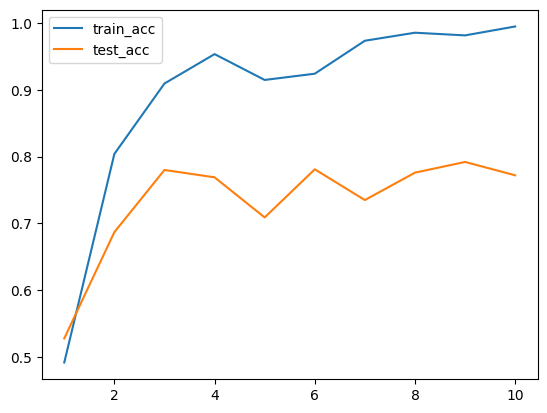

In [11]:
import matplotlib.pyplot as plt

acc = h1.history["acc"]
val_acc = h1.history["val_acc"]

plt.plot(range(1, len(acc)+1), acc, label="train_acc")
plt.plot(range(1, len(acc)+1), val_acc, label="test_acc")
plt.legend()

In [12]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights="imagenet", 
                  include_top = False, 
                  input_shape=(150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [13]:
import os
import os.path
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = "C:\\Users\\82103\\OneDrive\바탕 화면\\TechWeek"

train_dir = os.path.join(base_dir, "Training_DataSet")
test_dir = os.path.join(base_dir, "test")
validation_dir = os.path.join(base_dir, "validation")

dataGen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_feature(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4,4,512))
    labels = np.zeros(shape=(sample_count))
    
    generator = dataGen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode="sparse")
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        
        i = i+1
        
        if i*batch_size >= sample_count:
            break
        return features, labels
    

In [14]:
train_features, train_labels = extract_feature(train_dir, 5000)
validation_features, validation_labels = extract_feature(validation_dir, 1000)

Found 750 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [15]:
train_features = np.reshape(train_features, (5000, 4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))

train_features.shape, validation_features.shape

((5000, 8192), (1000, 8192))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model4 = Sequential()

model4.add(Dense(256, input_dim=train_features.shape[1], activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(5, activation="softmax"))

model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 2,098,693
Trainable params: 2,098,693
Non-trainable params: 0
_________________________________________________________________


In [17]:
model4.compile(loss="sparse_categorical_crossentropy", 
               optimizer="RMSprop", 
               metrics=["acc"])
h4 = model4.fit(train_features, 
                train_labels, 
                epochs=10, 
                batch_size=20, 
                validation_data=(validation_features, validation_labels))

Epoch 1/10
250/250 [==============================] - 3s 10ms/step - loss: 0.7420 - acc: 0.9964 - val_loss: 0.1103 - val_acc: 0.9880
Epoch 2/10
250/250 [==============================] - 3s 10ms/step - loss: 0.0247 - acc: 0.9980 - val_loss: 0.0377 - val_acc: 0.9880
Epoch 3/10
250/250 [==============================] - 3s 10ms/step - loss: 0.0067 - acc: 0.9986 - val_loss: 0.0313 - val_acc: 0.9890
Epoch 4/10
250/250 [==============================] - 3s 10ms/step - loss: 0.0066 - acc: 0.9988 - val_loss: 0.0807 - val_acc: 0.9870
Epoch 5/10
250/250 [==============================] - 3s 10ms/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0994 - val_acc: 0.9870
Epoch 6/10
250/250 [==============================] - 3s 10ms/step - loss: 0.0073 - acc: 0.9986 - val_loss: 0.0289 - val_acc: 0.9940
Epoch 7/10
250/250 [==============================] - 3s 10ms/step - loss: 0.0059 - acc: 0.9986 - val_loss: 0.0289 - val_acc: 0.9920
Epoch 8/10
250/250 [==============================] - 3s 10ms/step - 

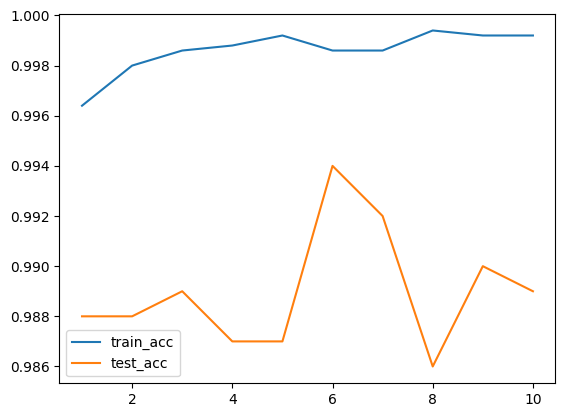

In [18]:
import matplotlib.pyplot as plt
acc = h4.history["acc"]
val_acc = h4.history["val_acc"]

plt.plot(range(1, len(acc)+1), acc, label="train_acc")
plt.plot(range(1, len(acc)+1), val_acc, label="test_acc")
plt.legend()

In [19]:
model4.save("Tech_Week_Image_Classification2.h5")

In [20]:
My_model = tf.keras.models.load_model("Tech_Week_Image_Classification2.h5")

In [21]:
predict_datagen  = ImageDataGenerator( rescale = 1.0/255. )
predict_generator = predict_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

Found 250 images belonging to 5 classes.


In [22]:
test_features, test_labels = extract_feature(test_dir, 250)

Found 250 images belonging to 5 classes.


In [23]:
test_features = np.reshape(test_features, (250, 4*4*512))
test_features.shape

(250, 8192)

In [24]:
test_loss, test_acc = My_model.evaluate(test_features, 
                                      test_labels, 
                                      batch_size = 20)
print(test_acc)

13/13 [==============================] - 0s 1ms/step - loss: 0.1103 - acc: 0.9640
0.9639999866485596


In [25]:
predictions = model4.predict(test_features)
print(predictions[0])
print(np.argmax(predictions[0]))
for i in range(250):
    if test_labels[i] != np.argmax(predictions[i]):
        print(test_labels[i])
        print(np.argmax(predictions[i])) 


[0.01989668 0.70160097 0.26101655 0.00821827 0.0092675 ]
1
0.0
1
3.0
2
2.0
1
1.0
3
4.0
1
4.0
1
3.0
2
0.0
1
2.0
4
